In [1]:
slices = [59219, 55466, 47544, 36443, 35917]
langs = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']

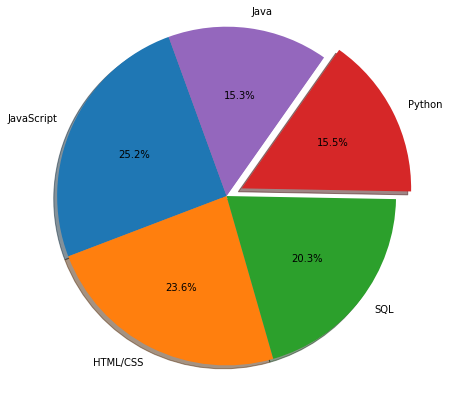

In [2]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = langs
sizes = slices
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(7,7))

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [3]:
fig.savefig("mypiechart.png", dpi=200)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('hist_data.csv')

In [5]:
data.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [6]:
data.shape

(79210, 2)

In [7]:
data.Age.nunique()

91

In [8]:
data.Age.max()

99

In [9]:
median = data.Age.median()

In [10]:
mean = data.Age.mean()

In [11]:
ages=data["Age"]

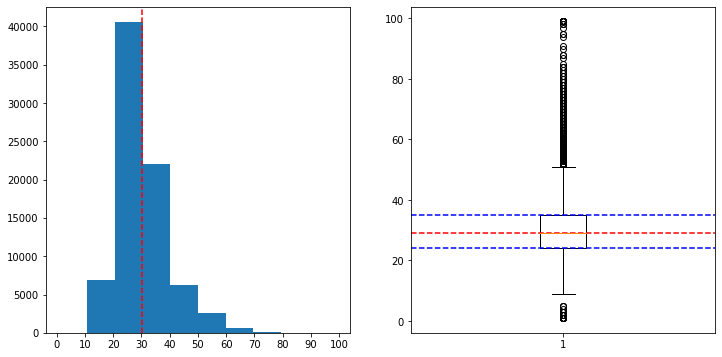

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(ages, bins=10) # = ax.hist(data["Age"])
ax[0].axvline(mean, color = "red", ls = "--")
ax[0].set_xticks([0,10,20,30,40,50,60,70,80,90,100]) # ax[0].set_xticks(range(0,100,10))

ax[1].boxplot(ages)
ax[1].axhline(median, color = "red", ls = "--")
ax[1].axhline(q25, color = "blue", ls = "--")
ax[1].axhline(q75, color = "blue", ls = "--");

In [13]:
from scipy.stats import iqr
q75, q25 = np.percentile(ages, [75, 25])
print("q1:", q25)
print("q3:", q75)
print("iqr:", iqr(ages))
lower_bound = q25-(1.5*iqr(ages))
upper_bound = q75+(1.5*iqr(ages))
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
print("min_value:", min(ages))
print("max_vale:", max(ages))

q1: 24.0
q3: 35.0
iqr: 11.0
lower bound: 7.5
upper bound: 51.5
min_value: 1
max_vale: 99


In [15]:
df = pd.read_csv('scatter_data.csv')

In [16]:
df.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [17]:
df.shape

(200, 3)

In [18]:
df.corr()

,view_count,likes,ratio
view_count,1.000000,0.936048,0.038939
likes,0.936048,1.000000,0.090327
ratio,0.038939,0.090327,1.000000


In [19]:
view_count = df["view_count"]

In [20]:
likes = df["likes"]

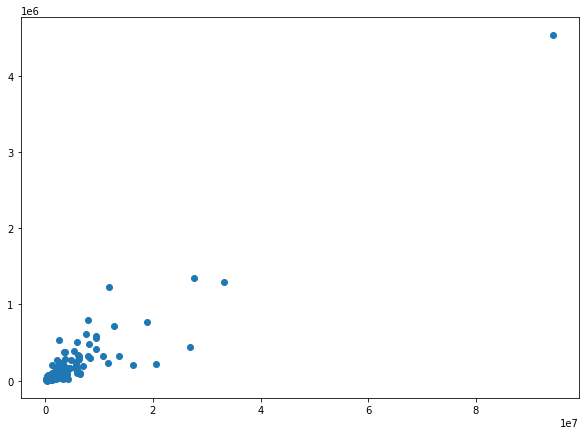

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(view_count, likes)

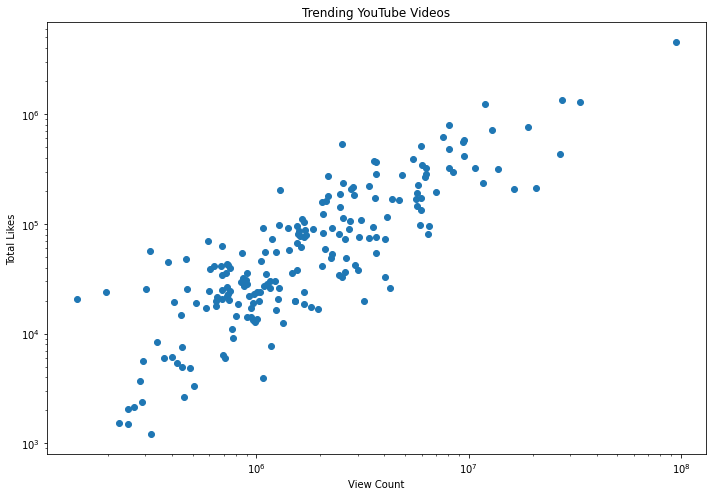

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(view_count, likes)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Trending YouTube Videos')
ax.set_xlabel('View Count')
ax.set_ylabel('Total Likes')
plt.tight_layout()

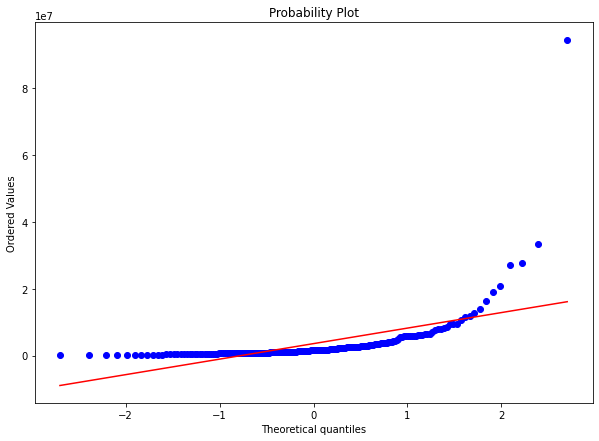

In [23]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 7))
reg=stats.probplot(df['view_count'], plot=plt)

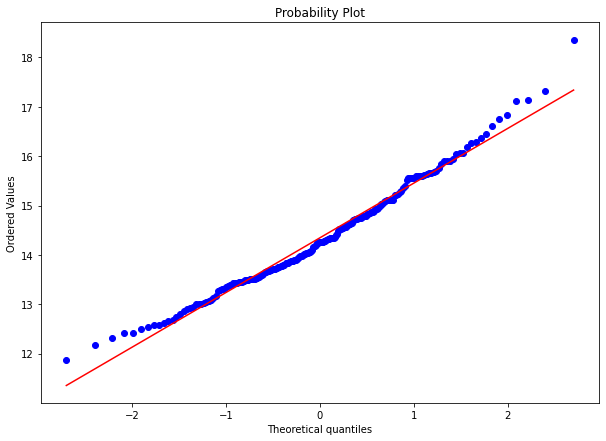

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
reg=stats.probplot(np.log(df["view_count"].values), plot=plt)

# time series

In [27]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas-datareader in c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages (0.9.0)



You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from pandas_datareader import data
from datetime import datetime
start = datetime(2020, 1, 1)
end = datetime(2020, 8, 30)

In [28]:
f = data.DataReader(name="AAPL", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [29]:
f.head()

,open,high,low,close,volume
2020-01-02,296.24,300.60,295.19,300.35,33870100
2020-01-03,297.15,300.58,296.50,297.43,36580700
2020-01-06,293.79,299.96,292.75,299.80,29596800
2020-01-07,299.84,300.90,297.48,298.39,27218000
2020-01-08,297.16,304.44,297.16,303.19,33019800


In [30]:
f.tail()

,open,high,low,close,volume
2020-08-24,514.7900,515.1400,495.745,503.43,86484442
2020-08-25,498.7900,500.7172,492.210,499.30,52873947
2020-08-26,504.7165,507.9700,500.330,506.09,40755567
2020-08-27,508.5700,509.9400,495.330,500.04,38888096
2020-08-28,504.0500,505.7700,498.310,499.23,46907479


In [31]:
g = data.DataReader(name="GOOG", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [32]:
g.head()

,open,high,low,close,volume
2020-01-02,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-03,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-06,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-07,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-08,1392.08,1411.58,1390.84,1404.32,1529177


In [33]:
g.tail()

,open,high,low,close,volume
2020-08-24,1593.98,1614.1700,1580.57,1588.20,1410229
2020-08-25,1582.07,1611.6200,1582.07,1608.22,2132084
2020-08-26,1608.00,1659.2200,1603.60,1652.38,3581072
2020-08-27,1653.68,1655.0000,1625.75,1634.33,1861602
2020-08-28,1633.49,1647.1699,1630.75,1644.41,1499782


In [34]:
a = data.DataReader(name="AMZN", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [35]:
a.head()

,open,high,low,close,volume
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604
2020-01-06,1860.00,1903.69,1860.00,1902.88,4065698
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966


In [36]:
a.tail()

,open,high,low,close,volume
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978


C:\Users\acer\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

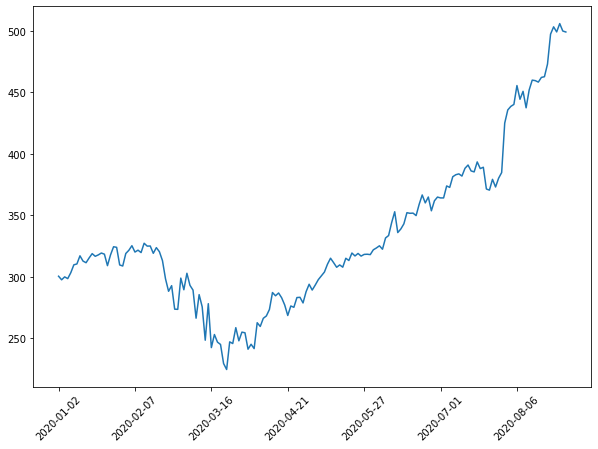

In [44]:
f.close.plot(figsize = (10,7), rot=45)

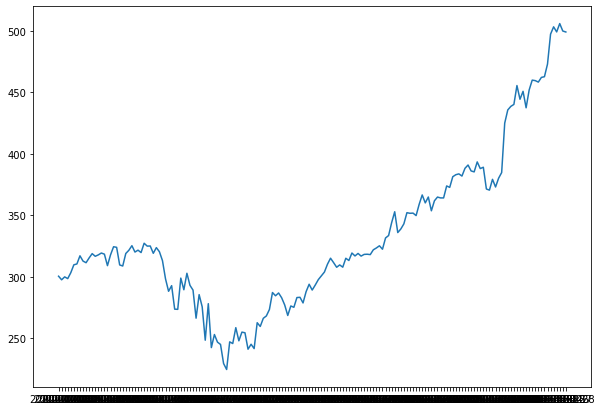

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(f.close.index, f.close);

In [46]:
f.index

Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
       ...
       '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28'],
      dtype='object', length=167)

In [47]:
f.index = pd.to_datetime(f.index)

In [48]:
f.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
               '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', length=167, freq=None)

<ipython-input-50-367238797539>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f.index, rotation=45)


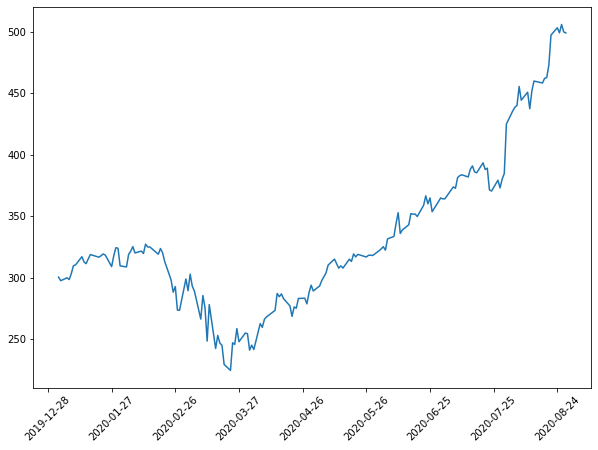

In [50]:
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(10,7))

#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.set_xticklabels(f.index, rotation=45)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.plot(f.close.index, f.close);

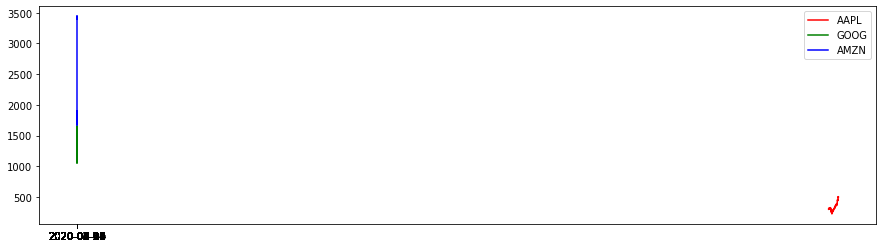

In [52]:
fig, ax =plt.subplots(figsize = (15,4))
ax.plot(f.close, color = "red", label="AAPL")
ax.plot(g.close, color = "green", label="GOOG")
ax.plot(a.close, color = "blue", label="AMZN")
ax.legend();